In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def uniform_distribution(bounds=[[0, 1], [0, 1]]):
    return [np.random.uniform(low=b[0], high=b[1]) for b in bounds]

def curved_clf(x):
    return 0.5 - x[0]**2 - x[1]**2 - x[1] - x[0]

def line_clf(x):
    return 0.5 - x[0] - x[1]

true_clf = lambda x : line_clf(x) > 0

In [3]:
def l2_dist(x, x_prime):
    return np.linalg.norm(x - x_prime)

def strategic_response(x, clf, reward=0.3):
    radius = 1.0
    best_samples = [x]
    for i in range(5):
        samples = []
        for b_s in best_samples:
            samples += [uniform_distribution([[b_s[0] - radius, b_s[0] + radius], 
                                              [b_s[1] - radius, b_s[1] + radius]]) for _ in range(100)]
        samples = np.array(samples)
        rewards = np.array([clf(s) * reward - l2_dist(x, s) for s in samples])
        rankings = np.argsort(rewards)
        best_samples = samples[rankings][-10:]
        radius /= 3
    return samples[rankings][-1], rewards[rankings][-1]

[0.1257686  0.37420482] 0.12320104843923876


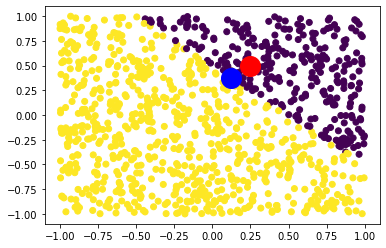

In [4]:
X = np.array([uniform_distribution([[-1, 1], [-1, 1]]) for _ in range(1000)])
Y = [true_clf(x) for x in X]
plt.scatter(X[:,0], X[:,1], c=Y)

x = [0.25,0.5]
x_pr, rew = strategic_response(x, true_clf)
plt.plot(x[0], x[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")
plt.plot(x_pr[0], x_pr[1], marker="o", markersize=20, markeredgecolor="blue", markerfacecolor="blue")
plt.plot()
print(x_pr, rew)

In [5]:
# np.array([1,1,3]) @ (np.array([2,2]) + [1])
list(np.array([2,2])) + [1]

[2, 2, 1]

In [6]:
def perceptron_clf(theta, x):
    return theta @ (list(x) + [1]) > 0

def perceptron_update(theta, x, acc):
    if acc:
        return theta
    y = theta @ (list(x) + [1])
#     print(y)
    y = -1 if y <= 0 else 1
    theta -= y * np.array((list(x) + [1]))
#     print(theta)
    return theta

In [7]:
def im_stupid(theta, x_0):
    return (-1) * (theta[0] * x_0 + theta[2]) / theta[1]

def fn_points(clf, bounds=[[-1, 1],[-1, 1]]):
    points = [uniform_distribution(bounds) for _ in range(100_000)]
    points = [p for p in points if np.absolute(clf(p)) < 0.01]
    return points

C:\Users\Alex\AppData\Local\Temp\ipykernel_5832\1238973547.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (-1) * (theta[0] * x_0 + theta[2]) / theta[1]


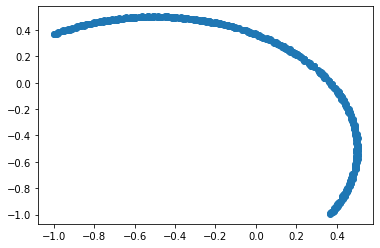

In [10]:
plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)])
ps = np.array(fn_points(curved_clf))
plt.scatter(ps[:,0], ps[:,1])

In [50]:
X_inc = []
Y_inc = []
theta = np.array([0.,0.,0.])
true_clf = lambda x : line_clf(x) > 0
ps = np.array(fn_points(line_clf))

True features: [0.4267002454659763, 0.42995321746128856]
Modf features: [0.42622901 0.42981859] distance: 0.0004900897036349073 reward: 0.2995099102963651
Accurate: False [label: 0 pred: 1 ]
Theta: [-1.48500218 -0.90481923  0.        ]


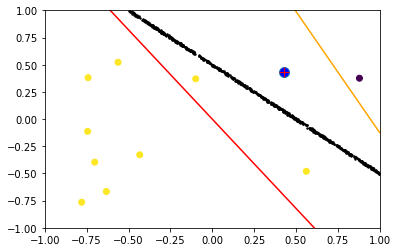

In [34]:
# PERCEPTRON

x = uniform_distribution([[-1, 1], [-1, 1]])
y = true_clf(x)

# th_true = [-1, -1, 0.5]
# plt.plot([-1, 1], [im_stupid(th_true, -1), im_stupid(th_true, 1)], c='purple')
plt.scatter(ps[:,0], ps[:,1], c='black', s=2)
plt.plot(x[0], x[1], marker='o', markersize=10, markerfacecolor='yellow' if y else 'blue')

pred_clf = lambda x : perceptron_clf(theta, x)
x_prime, r = strategic_response(x, pred_clf)
X_inc += [x_prime]

yhat = perceptron_clf(theta, x_prime)
Y_inc += [y]

# pred = ['blue' if perceptron_clf(theta, strategic_response(x, true_clf)[0]) else 'red' for x in X_inc]
X_np = np.array(X_inc)
plt.scatter(X_np[:,0], X_np[:,1], c=Y_inc)
plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)], c='orange') # old clf boundary
plt.xlim(-1, 1)
plt.ylim(-1, 1)


plt.plot(x_prime[0], x_prime[1], marker='+', markersize=10, markeredgecolor='red' if yhat else 'red')
acc = y == yhat
theta = perceptron_update(theta, x_prime, acc)
plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)], c='red') # true clf boundary is red
print('True features:', x)
print('Modf features:', x_prime, 'distance:', l2_dist(x, x_prime), 'reward:', r)
print('Accurate:', acc, '[label:', int(y), 'pred:', int(yhat), ']')
print('Theta:', theta)
# print(x, x_prime, 'label', int(y), 'prediction', int(yhat), theta)

# x = [0.25,0.5]
# x_pr, rew = strategic_response(x, true_clf)
# plt.plot(x[0], x[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")
# plt.plot(x_pr[0], x_pr[1], marker="o", markersize=20, markeredgecolor="blue", markerfacecolor="blue")
# plt.plot()
# print(x_pr, rew)

In [42]:
X_inc, Y_inc

([array([-0.74141246,  0.38115522]),
  array([0.87946282, 0.37596761]),
  array([ 0.56210211, -0.48018825]),
  array([-0.70198521, -0.39614937]),
  array([-0.74433651, -0.11308464]),
  array([-0.78004867, -0.76458608]),
  array([-0.5623958 ,  0.52246981]),
  array([-0.43308623, -0.32856315]),
  array([-0.63265098, -0.66612805]),
  array([-0.09882891,  0.370405  ]),
  array([0.42622901, 0.42981859])],
 [True, False, True, True, True, True, True, True, True, True, False])

In [43]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_inc, Y_inc)

SVC(kernel='linear')

In [46]:
list(clf.coef_[0]) + [clf.intercept_[0]]

[-0.8424186325881865, -0.9155694444426724, 1.0192321338690817]

True features: [0.15300720712182514, -0.8905973429583105]
Modf features: [ 0.15306578 -0.89064534] distance: 7.572427753037467e-05 reward: 0.2999242757224696
Accurate: True [label: 1 pred: 1 ]
Theta: [-2.31193779 -2.23500954  1.24376682]


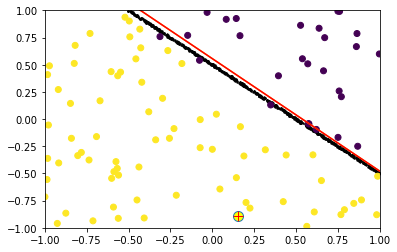

In [150]:
# SVM

x = uniform_distribution([[-1, 1], [-1, 1]])
y = true_clf(x)

# th_true = [-1, -1, 0.5]
# plt.plot([-1, 1], [im_stupid(th_true, -1), im_stupid(th_true, 1)], c='purple')
plt.scatter(ps[:,0], ps[:,1], c='black', s=2)
plt.plot(x[0], x[1], marker='o', markersize=10, markerfacecolor='yellow' if y else 'blue')

pred_clf = lambda x : perceptron_clf(theta, x)
x_prime, r = strategic_response(x, pred_clf)
X_inc += [x_prime]

yhat = perceptron_clf(theta, x_prime)
Y_inc += [y]

# pred = ['blue' if perceptron_clf(theta, strategic_response(x, true_clf)[0]) else 'red' for x in X_inc]
X_np = np.array(X_inc)
plt.scatter(X_np[:,0], X_np[:,1], c=Y_inc)
plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)], c='orange') # old clf boundary
plt.xlim(-1, 1)
plt.ylim(-1, 1)


plt.plot(x_prime[0], x_prime[1], marker='+', markersize=10, markeredgecolor='red' if yhat else 'red')
acc = y == yhat

clf.fit(X_inc, Y_inc)
theta = np.array(list(clf.coef_[0]) + [clf.intercept_[0]])

plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)], c='red') # true clf boundary is red
print('True features:', x)
print('Modf features:', x_prime, 'distance:', l2_dist(x, x_prime), 'reward:', r)
print('Accurate:', acc, '[label:', int(y), 'pred:', int(yhat), ']')
print('Theta:', theta)
# print(x, x_prime, 'label', int(y), 'prediction', int(yhat), theta)

# x = [0.25,0.5]
# x_pr, rew = strategic_response(x, true_clf)
# plt.plot(x[0], x[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")
# plt.plot(x_pr[0], x_pr[1], marker="o", markersize=20, markeredgecolor="blue", markerfacecolor="blue")
# plt.plot()
# print(x_pr, rew)

(-1.0, 1.0)

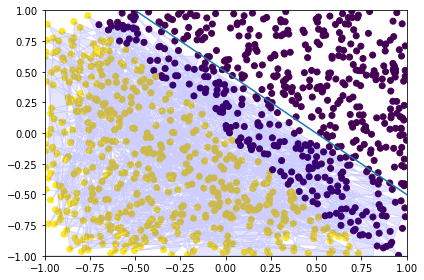

In [371]:
# PRETTY PLOT PERCEPTRON

Y = [perceptron_clf(theta, x) for x in X]
plt.scatter(X[:,0], X[:,1], c=Y)
Y = [true_clf(x) for x in X]
positives = X[Y]
plt.fill_between(positives[:,0], positives[:,1], -1, color='blue', alpha=.1)
th_true = [-1, -1, 0.5]
plt.plot([-1, 1], [im_stupid(th_true, -1), im_stupid(th_true, 1)])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

True features: [-0.8207609912051552, -0.6129460568879812]
Modf features: [-0.82076099 -0.61294606] distance: 0.0 reward: -1
Accurate: True [label: 1 pred: 1 ]
Theta: [-1.55434495 -2.06560666  1.        ]


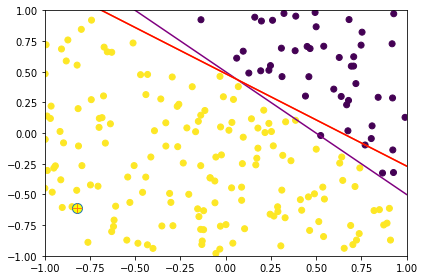

In [480]:
# NON STRATEGIC PERCEPTRON

x = uniform_distribution([[-1, 1], [-1, 1]])
y = true_clf(x)

th_true = [-1, -1, 0.5]
plt.plot([-1, 1], [im_stupid(th_true, -1), im_stupid(th_true, 1)], c='purple')

pred_clf = lambda x : perceptron_clf(theta, x)
x_prime, r = strategic_response(x, pred_clf)
x_prime = np.array(x)
r = -1
X_inc += [x]
Y_inc += [y]
# pred = ['blue' if perceptron_clf(theta, strategic_response(x, true_clf)[0]) else 'red' for x in X_inc]
X_np = np.array(X_inc)
plt.scatter(X_np[:,0], X_np[:,1], c=Y_inc)
plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)], c='orange')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

yhat = perceptron_clf(theta, x_prime)
plt.plot(x[0], x[1], marker='o', markersize=10, markerfacecolor='yellow' if y else 'navy')
plt.plot(x_prime[0], x_prime[1], marker='+', markersize=10, markerfacecolor='yellow' if yhat else 'blue')
acc = y == yhat
theta = perceptron_update(theta, x_prime, acc)
plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)], c='red')
print('True features:', x)
print('Modf features:', x_prime, 'distance:', l2_dist(x, x_prime), 'reward:', r)
print('Accurate:', acc, '[label:', int(y), 'pred:', int(yhat), ']')
print('Theta:', theta)
# print(x, x_prime, 'label', int(y), 'prediction', int(yhat), theta)

# x = [0.25,0.5]
# x_pr, rew = strategic_response(x, true_clf)
# plt.plot(x[0], x[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")
# plt.plot(x_pr[0], x_pr[1], marker="o", markersize=20, markeredgecolor="blue", markerfacecolor="blue")
# plt.plot()
# print(x_pr, rew)

In [208]:
import cvxpy as cp

def simple_strategic_svm(X, Y, reward=0.3, C=1):
    n, d = X.shape
    X = np.hstack([X, np.ones(n).reshape(-1, 1)]) # attach bias column
    phi = cp.Variable(d+1)
    zeta = cp.Variable(n)
    
    objective = cp.Minimize(cp.sum_squares(phi) + C * cp.sum(zeta))
    constraints = [cp.multiply(Y, (phi @ X.T).T) >= 1 - zeta - reward * Y,
                  zeta >= 0]
    prob = cp.Problem(objective, constraints)#, constraints)
    result = prob.solve()#qcp=True)
    
    return phi.value

def simple_normal_svm(X, Y, reward=0.3, C=1):
    n, d = X.shape
    X = np.hstack([X, np.ones(n).reshape(-1, 1)]) # attach bias column
    phi = cp.Variable(d+1)
    zeta = cp.Variable(n)
    
    objective = cp.Minimize(cp.sum_squares(phi) + C * cp.sum(zeta))
    constraints = [cp.multiply(Y, (phi @ X.T).T) >= 1 - zeta,
                  # phi >= 0,
                  zeta >= 0]
    prob = cp.Problem(objective, constraints)#, constraints)
    result = prob.solve()#qcp=True)
    
    return phi.value

In [176]:
def svm_update(X, Y, reward=0.3):
    A = np.array([[0, 1] if y else [1, 0] for y in Y])
    u = np.array([0, reward])
    phi = normal_svm(X, A, u)
    return phi[1,:] - phi[0,:]

In [205]:
simple_strategic_svm(np.array(X_inc), np.array([1 if y else -1 for y in Y_inc]), C=10)

array([-4.40503161, -3.97053735,  2.13522826])

True features: [0.8964075220137389, 0.21180365554577185]
Modf features: [0.89652014 0.21139865] distance: 0.00042036751775289107 reward: -0.00042036751775289107
Accurate: True [label: 0 pred: 0 ]
Theta: [-2.15551866 -2.28250873  0.92446986]


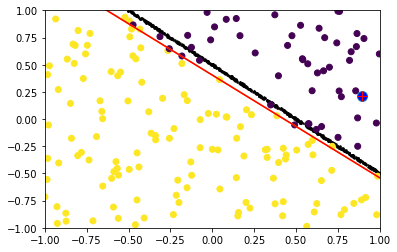

In [262]:
# SVM

x = uniform_distribution([[-1, 1], [-1, 1]])
y = true_clf(x)

# th_true = [-1, -1, 0.5]
# plt.plot([-1, 1], [im_stupid(th_true, -1), im_stupid(th_true, 1)], c='purple')
plt.scatter(ps[:,0], ps[:,1], c='black', s=2)
plt.plot(x[0], x[1], marker='o', markersize=10, markerfacecolor='yellow' if y else 'blue')

pred_clf = lambda x : perceptron_clf(theta, x)
x_prime, r = strategic_response(x, pred_clf)
X_inc += [x_prime]

yhat = perceptron_clf(theta, x_prime)
Y_inc += [y]

# pred = ['blue' if perceptron_clf(theta, strategic_response(x, true_clf)[0]) else 'red' for x in X_inc]
X_np = np.array(X_inc)
plt.scatter(X_np[:,0], X_np[:,1], c=Y_inc)
plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)], c='orange') # old clf boundary
plt.xlim(-1, 1)
plt.ylim(-1, 1)


plt.plot(x_prime[0], x_prime[1], marker='+', markersize=10, markeredgecolor='red' if yhat else 'red')
acc = y == yhat


theta = simple_strategic_svm(np.array(X_inc), np.array([1 if y else -1 for y in Y_inc]), reward=0.3)

plt.plot([-1, 1], [im_stupid(theta, -1), im_stupid(theta, 1)], c='red') # true clf boundary is red
print('True features:', x)
print('Modf features:', x_prime, 'distance:', l2_dist(x, x_prime), 'reward:', r)
print('Accurate:', acc, '[label:', int(y), 'pred:', int(yhat), ']')
print('Theta:', theta)
# print(x, x_prime, 'label', int(y), 'prediction', int(yhat), theta)

# x = [0.25,0.5]
# x_pr, rew = strategic_response(x, true_clf)
# plt.plot(x[0], x[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")
# plt.plot(x_pr[0], x_pr[1], marker="o", markersize=20, markeredgecolor="blue", markerfacecolor="blue")
# plt.plot()
# print(x_pr, rew)